In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [66]:
df= pd.read_csv('Visleshana Dataset.csv',encoding= 'unicode_escape')

In [67]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Customer ID,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity
0,1,CA-2018-152156,08-11-2018,11-11-2018,CG-12520,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2
1,2,CA-2018-152156,08-11-2018,11-11-2018,CG-12520,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3
2,3,CA-2018-138688,12-06-2018,16-06-2018,DV-13045,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,1


In [35]:
data=df.copy()

In [36]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Customer ID      0
Country          0
City             0
State            0
Postal Code     11
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            1
Quantity         0
dtype: int64

### We dont need the below cloumnsas they is only one country and we have index.

In [37]:
data.drop(columns=['Row ID','Country','Postal Code'],inplace=True)

### we are handling the missing values with meadian as there are many outliers and we can't remove outliers because  we don't want to loose any data

In [38]:
data['Sales']=data.Sales.fillna(data.Sales.median())

In [39]:
data.Category.value_counts()

Office Supplies                6217
Furniture                      2180
Technology                     1916
Technology+OL9935:P9938           1
TEC-PH-1000+L9935:P99384912       1
Name: Category, dtype: int64

In [44]:
data[data['Category']=='TEC-PH-1000+L9935:P99384912']

,Order ID,Order Date,Ship Date,Customer ID,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity
9961,CA-2017-168088,19-03-2017,22-03-2017,CM-12655,Houston,Texas,Central,OFF-PA-10000675,TEC-PH-1000+L9935:P99384912,Paper,Xerox 1919,65.584,1


### I have replaced the 'Technology+OL9935:P9938' with 'Technology' and 'TEC-PH-1000+L9935:P99384912' with 'office supplies', by looking at their sub-categories I have replaced it.

In [45]:
data.Category.replace({'Technology+OL9935:P9938':'Technology','TEC-PH-1000+L9935:P99384912':'Office Supplies'},inplace=True)

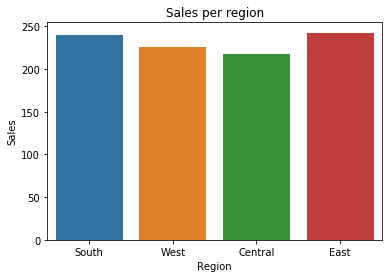

In [46]:
sns.barplot(x=data.Region, y=data.Sales, ci=None)
plt.title('Sales per region')
plt.show()

### If you see the above graph, sales per region. The east region having the highest sales and central having less sales compared.

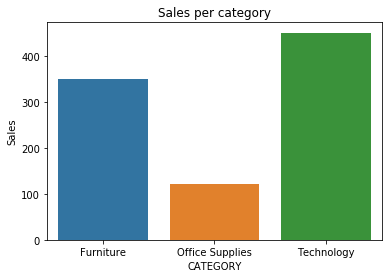

In [47]:
sns.barplot(x=data.Category, y=data.Sales, ci=None)
plt.title('Sales per category')
plt.xlabel('CATEGORY')
plt.show()

### From the above graph we came to know that technology category having the highest sales and office supplies category having the lowest sales

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10315 entries, 0 to 10314
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      10315 non-null  object 
 1   Order Date    10315 non-null  object 
 2   Ship Date     10315 non-null  object 
 3   Customer ID   10315 non-null  object 
 4   City          10315 non-null  object 
 5   State         10315 non-null  object 
 6   Region        10315 non-null  object 
 7   Product ID    10315 non-null  object 
 8   Category      10315 non-null  object 
 9   Sub-Category  10315 non-null  object 
 10  Product Name  10315 non-null  object 
 11  Sales         10315 non-null  float64
 12  Quantity      10315 non-null  int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


### Only the sales and integer are numerical varaibles rest are objects. In the dataset there are date_time varaibles where we need to convert them to date_time varaibles.

In [49]:
data['Order Date']=pd.to_datetime(data['Order Date'])
data['Ship Date']=pd.to_datetime(data['Ship Date'])

### The order ID consist of '-' where we need to remove the hyphen and join them using split method.

In [50]:
data['Order ID']=data['Order ID'].str.split('-', expand=True)[0]+data['Order ID'].str.split('-', expand=True)[1]+data['Order ID'].str.split('-', expand=True)[2]

In [51]:
data['Order ID']

0        CA2018152156
1        CA2018152156
2        CA2018138688
3        US2017108966
4        US2017108966
             ...     
10310    CA2016100901
10311    CA2016101399
10312    CA2016101399
10313    CA2016101399
10314    CA2016101399
Name: Order ID, Length: 10315, dtype: object

### To get the last date of the purchase

In [52]:
snapshot_date = data['Order Date'].max() + dt.timedelta(days=1)

### The Order ID of your puchase tells about the 'Frecency', Sales is about 'Monetary' and Order Date is about 'Recency'

In [53]:
data_RFM =data.groupby(['Customer ID']).agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID':'count',
     'Sales':'sum'})

In [54]:
data_RFM.rename(columns={'Order Date':'recency','Order ID':'frequency','Sales':'monetary'}, inplace=True)

In [55]:
data_RFM

,recency,frequency,monetary
Customer ID,,,
AA-10315,185,11,5563.560
AA-10375,49,15,1056.390
AA-10480,260,12,1790.512
AA-10645,38,33,10617.937
AB-10015,446,6,886.156
...,...,...,...
XP-21865,44,28,2374.658
YC-21895,5,8,5454.350
YS-21880,10,12,6720.444


### using the quantiles 0.25,0.5,0.75 

In [56]:
quantiles = data_RFM[['frequency','monetary','recency' ]].quantile(q=[0.25,0.5,0.75])
quantiles

,frequency,monetary,recency
0.25,8.0,1203.334,37.0
0.50,12.0,2302.368,93.0
0.75,17.0,3908.262,217.0


In [57]:
quantiles = quantiles.to_dict()
quantiles

{'frequency': {0.25: 8.0, 0.5: 12.0, 0.75: 17.0},
 'monetary': {0.25: 1203.334, 0.5: 2302.368, 0.75: 3908.2619999999997},
 'recency': {0.25: 37.0, 0.5: 93.0, 0.75: 217.0}}

### We create two classes for the RFM segmentation since, being high recency is bad, while high frequency and monetary value is good.
### Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

In [58]:

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [59]:
data_RFM['R_Quartile'] = data_RFM['recency'].apply(RClass, args=('recency',quantiles,))
data_RFM['F_Quartile'] = data_RFM['frequency'].apply(FMClass, args=('frequency',quantiles,))
data_RFM['M_Quartile'] = data_RFM['monetary'].apply(FMClass, args=('monetary',quantiles,))

In [60]:
data_RFM.head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile
Customer ID,,,,,,
AA-10315,185,11,5563.560,3,3,1
AA-10375,49,15,1056.390,2,2,4
AA-10480,260,12,1790.512,4,3,3
AA-10645,38,33,10617.937,2,1,1
AB-10015,446,6,886.156,4,4,4


In [68]:
data_RFM=data_RFM.assign(R_seg=np.nan, FM_seg =np.nan)
data_RFM.R_seg[data_RFM['R_Quartile']==4] = "3.Churn"
data_RFM.R_seg[data_RFM['R_Quartile']==2] = "2.At Risk"
data_RFM.R_seg[data_RFM['R_Quartile']==3] = "2.At Risk"
data_RFM.R_seg[data_RFM['R_Quartile']==1] = "1.Active"

data_RFM.FM_seg[(data_RFM['F_Quartile']==3) & (data_RFM['M_Quartile']==1)] = "2.Gold"
data_RFM.FM_seg[(data_RFM['F_Quartile']==4) & (data_RFM['M_Quartile']==1)] = "2.Gold"
data_RFM.FM_seg[(data_RFM['F_Quartile']==2) & (data_RFM['M_Quartile']==2)] = "2.Gold"
data_RFM.FM_seg[(data_RFM['F_Quartile']==4) & (data_RFM['M_Quartile']==2)] = "1.Silver"
data_RFM.FM_seg[(data_RFM['F_Quartile']==1) & (data_RFM['M_Quartile']==3)] = "2.Gold"
data_RFM.FM_seg[(data_RFM['F_Quartile']==2) & (data_RFM['M_Quartile']==3)] = "2.Gold"
data_RFM.FM_seg[(data_RFM['F_Quartile']==3) & (data_RFM['M_Quartile']==3)] = "1.Silver"
data_RFM.FM_seg[(data_RFM['F_Quartile']==4) & (data_RFM['M_Quartile']==3)] = "1.Silver"
data_RFM.FM_seg[(data_RFM['F_Quartile']==1) & (data_RFM['M_Quartile']==4)] = "2.Gold"
data_RFM.FM_seg[(data_RFM['F_Quartile']==1) & (data_RFM['M_Quartile']==2)] = "2.Gold"
data_RFM.FM_seg[(data_RFM['F_Quartile']==2) & (data_RFM['M_Quartile']==4)] = "1.Silver"
data_RFM.FM_seg[(data_RFM['F_Quartile']==3) & (data_RFM['M_Quartile']==4)] = "1.Silver"
data_RFM.FM_seg[(data_RFM['F_Quartile']==4) & (data_RFM['M_Quartile']==4)] = "0.Standard"

data_RFM.FM_seg.fillna("4.Premium", inplace=True)

In [69]:
data_RFM['R_seg'].value_counts()

2.At Risk    394
1.Active     201
3.Churn      198
Name: R_seg, dtype: int64

In [70]:
data_RFM.sort_values(by=['R_seg'])

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg
Customer ID,,,,,,,,
PF-19120,36,23,11298.480,1,1,1,1.Active,4.Premium
DJ-13630,13,8,3356.398,1,4,2,1.Active,1.Silver
NS-18505,7,15,2575.863,1,2,2,1.Active,2.Gold
DK-12895,23,15,4282.176,1,2,1,1.Active,4.Premium
DK-12985,8,8,1687.040,1,4,3,1.Active,1.Silver
...,...,...,...,...,...,...,...,...
LR-16915,263,16,5142.892,4,2,1,3.Churn,4.Premium
HD-14785,769,7,251.360,4,4,4,3.Churn,0.Standard
NF-18475,526,8,908.650,4,4,4,3.Churn,0.Standard


In [64]:
col_kpi=['monetary','recency','frequency']

In [27]:
Profiling=data_RFM.groupby(['R_seg', 'FM_seg']).apply(lambda x: x[col_kpi].mean())

In [28]:
Profiling

monetary     recency  frequency
R_seg     FM_seg                                        
1.Active  0.Standard   501.899590   20.200000   5.850000
          1.Silver    1504.030587   18.521739   9.586957
          2.Gold      3058.940507   17.550725  16.463768
          4.Premium   6122.624439   19.060606  19.045455
2.At Risk 0.Standard   602.539811  111.092593   5.314815
          1.Silver    1525.399266  104.480769   9.740385
          2.Gold      3091.857162   93.258333  16.783333
          4.Premium   5635.845767  106.008621  17.827586
3.Churn   0.Standard   527.881768  477.517857   5.142857
          1.Silver    1550.233269  419.397059   8.573529
          2.Gold      3748.812810  357.475000  13.875000
          4.Premium   5480.570865  378.117647  16.352941

### Calculating K value usig silhoutte Score

In [29]:
x1=Profiling.copy()
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(x1)
    scores.append(metrics.silhouette_score(x1, km.labels_))

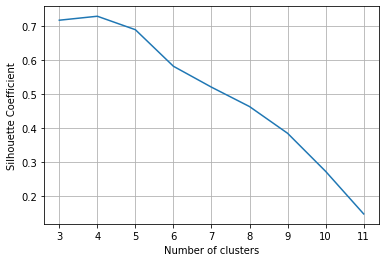

In [30]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### From the above plot we found that K value has the highest Silhouette coefficient, So We take K value as 4.

In [31]:
kmeans_new= KMeans(4)
kmeans_new.fit(x1)
cluster_final= x1.copy()
cluster_final['cluster_4']=kmeans_new.fit_predict(x1)
cluster_final

cluster_final

monetary     recency  frequency  cluster_4
R_seg     FM_seg                                                   
1.Active  0.Standard   501.899590   20.200000   5.850000          1
          1.Silver    1504.030587   18.521739   9.586957          3
          2.Gold      3058.940507   17.550725  16.463768          0
          4.Premium   6122.624439   19.060606  19.045455          2
2.At Risk 0.Standard   602.539811  111.092593   5.314815          1
          1.Silver    1525.399266  104.480769   9.740385          3
          2.Gold      3091.857162   93.258333  16.783333          0
          4.Premium   5635.845767  106.008621  17.827586          2
3.Churn   0.Standard   527.881768  477.517857   5.142857          1
          1.Silver    1550.233269  419.397059   8.573529          3
          2.Gold      3748.812810  357.475000  13.875000          0
          4.Premium   5480.570865  378.117647  16.352941          2

In [32]:
# Calculate average RFM values for each cluster
cluster_avg = cluster_final.groupby(['cluster_4']).mean()
cluster_avg

,monetary,recency,frequency
cluster_4,,,
0,3299.870160,156.094686,15.707367
1,544.107056,202.936817,5.435891
2,5746.347024,167.728958,17.741994
3,1526.554374,180.799856,9.300290
